In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


import matplotlib
matplotlib.rcParams["figure.figsize"] = (10,10)
matplotlib.rcParams["image.cmap"] = "gray"

In [2]:
from skimage import color


In [12]:
img = cv2.imread("image/uv_a.jpg")

In [5]:
imgGray = cv2.imread("image/uv_a.jpg", cv2.IMREAD_GRAYSCALE)

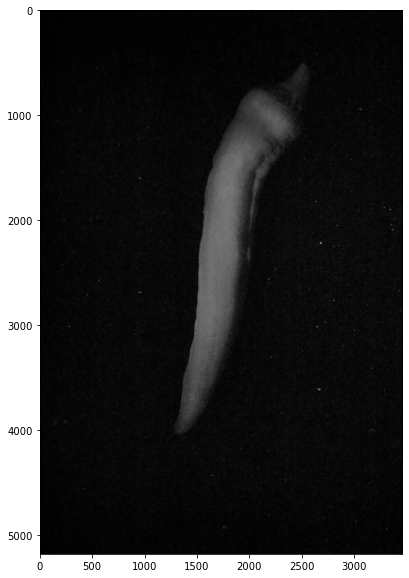

In [8]:
plt.imshow(img)

In [9]:
# Apply Otsu's thresholding
ret, thresholded_img = cv2.threshold(img, 10, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print(ret)

46.0


In [10]:
# convert the thresholded image into a binary image, where the pixels that
#meet the threshold criteria are set to 1 and the pixels that do not meet the criteria are set to 0.
mask = thresholded_img.astype(np.uint8) 

Text(0.5, 1.0, 'mask')

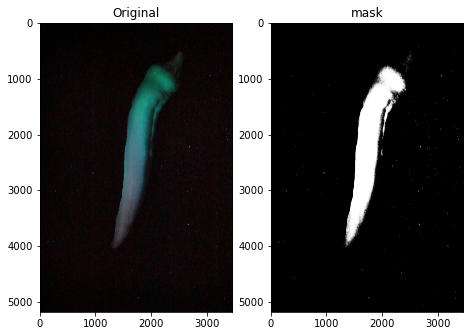

In [13]:
original_image = img.copy()
# Show the original and thresholded images
plt.figure(figsize=(20,10))
plt.subplot(151)
plt.imshow(original_image[:,:,::-1])

plt.title("Original")
plt.subplot(152)
plt.imshow(mask)
plt.title("mask")

Text(0.5, 1.0, 'mask overlay')

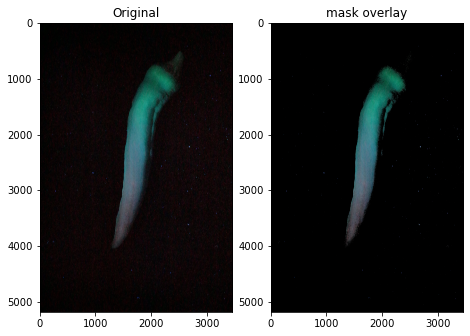

In [14]:
# you can use the binary mask to extract specific information or features from the original image.
masked_image = cv2.bitwise_and(original_image, original_image, mask = mask)
original_image = img.copy()
# Show the original and thresholded images
plt.figure(figsize=(20,10))
plt.subplot(151)
plt.imshow(original_image[:,:,::-1])

plt.title("Original")
plt.subplot(152)
plt.imshow(masked_image[:,:,::-1])
plt.title("mask overlay")

In [16]:
# convert the ROI to the CIELAB color space
lab_image_skimage = color.rgb2lab(masked_image)

# extract the L, A, and B channels
L1, A1, B1 = cv2.split(lab_image_skimage)

# print the mean values of the L, A, and B channels
print("L1:", np.mean(L1))
print("A1:", np.mean(A1))
print("B1:", np.mean(B1))

L1: 2.6484142768634737
A1: -0.44654787785207956
B1: 1.7659012841537838


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'l1*a1*b1*')

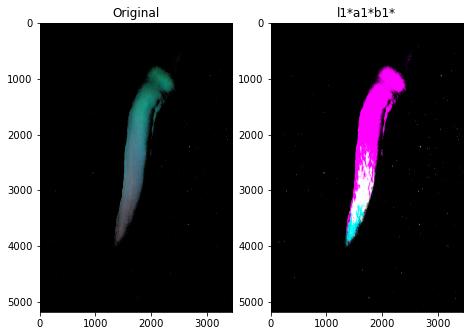

In [18]:
# Show the original and thresholded images
plt.figure(figsize=(20,10))
plt.subplot(151)
plt.imshow(masked_image.copy()[:,:,::-1])
plt.title("Original")
plt.subplot(152)
plt.imshow(lab_image_skimage[:,:,::-1])
plt.title("l1*a1*b1*")

In [19]:
# standard deviation
l_std1 = np.std(L1)
a_std1 = np.std(A1)
b_std1 = np.std(B1)
# min values
l_min1 = np.min(L1)
a_min1 = np.min(A1)
b_min1 = np.min(B1)
# max values
l_max1 = np.max(L1)
a_max1 = np.max(A1)
b_max1 = np.max(B1)

In [20]:
print("l_std1: ", l_std1)
print("a_std1: ", a_std1)
print("b_std1: ", b_std1)

print(" ")

# min values
print("l_min1: ", l_min1)
print("a_min1: ", a_min1)
print("b_min1: ", b_min1)

print(" ")

# max values
print("l_max1: ", l_max1)
print("a_max1: ", a_max1)
print("b_max1: ", b_max1)

l_std1:  10.462270546748131
a_std1:  2.9267992782346006
b_std1:  7.927056178350407
 
l_min1:  0.0
a_min1:  -30.900136092919638
b_min1:  -57.525407577197974
 
l_max1:  99.70981069310231
a_max1:  62.258685171661554
b_max1:  60.670662710168635
